In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import os

In [4]:
print("NumPy:", np.__version__)

NumPy: 1.23.5


In [5]:
import numpy as np, pandas as pd

arr = np.arange(9).reshape(3,3)
df = pd.DataFrame(arr, columns=["A","B","C"])
print(df)
print(df.describe())


   A  B  C
0  0  1  2
1  3  4  5
2  6  7  8
         A    B    C
count  3.0  3.0  3.0
mean   3.0  4.0  5.0
std    3.0  3.0  3.0
min    0.0  1.0  2.0
25%    1.5  2.5  3.5
50%    3.0  4.0  5.0
75%    4.5  5.5  6.5
max    6.0  7.0  8.0


In [6]:
import pyarrow, numexpr, bottleneck

In [7]:
print("PyArrow:", pyarrow.__version__)
print("NumExpr:", numexpr.__version__)
print("Bottleneck:", bottleneck.__version__)

PyArrow: 19.0.0
NumExpr: 2.11.0
Bottleneck: 1.5.0


In [8]:
print("Pandas version:", pd.__version__)

Pandas version: 2.3.2


In [9]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [11]:
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opendatasets from https://files.pythonhosted.org/packages/00/e7/12300c2f886b846375c78a4f32c0ae1cd20bdcf305b5ac45b8d7eceda3ec/opendatasets-0.1.22-py3-none-any.whl.metadata
  Obtaining dependency information for kaggle from https://files.pythonhosted.org/packages/14/83/7f29c7abe0d5dc769dad7da993382c3e4239ad63e1dd58414d129e0a4da2/kaggle-1.7.4.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/181.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/181.2 kB ? eta -:--:--
   --------- ------------------------------ 41.0/181.2 kB ? eta -:--:--
   --------------- ----------------------- 71.7/181.2 kB 991.0 kB/s eta 0:00:01
   ------------------------------- -------- 143.4/181.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 181.2/181.2 kB 1.2 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset/data')

Skipping, found downloaded files in ".\face-expression-recognition-dataset" (use force=True to force download)


In [11]:
from tensorflow import keras

In [12]:
from keras.utils import to_categorical
from keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [13]:
Train_dir = '/content/face-expression-recognition-dataset/images/train'
test_dir = '/content/face-expression-recognition-dataset/images/validation'

In [14]:
Train_dir = 'images/train'
test_dir = 'images/test'

In [15]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [16]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(Train_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [17]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [18]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(test_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [19]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [20]:
from tqdm.notebook import tqdm

In [21]:
from tqdm.notebook import tqdm
for i in tqdm(range(10)):
    pass

  0%|          | 0/10 [00:00<?, ?it/s]

In [22]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [23]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [24]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [25]:
x_train = train_features/255.0
x_test = test_features/255.0

**Our model will work in Supervised Learning, because hum uss input kay saath uss input ka label bh deingy, jaisey yeh angry ki image hei yeh sad ki hei yeh happy ki hei. So in supervised learning we give the label along with the image.**

**Toh label banane kay liye hum label encoder ka use kreingy jo sklearn module mein hota hei**


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [29]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [30]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [31]:
model = Sequential()

# Convolutional Layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))

In [32]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
198/226 [=========================>....] - ETA: 1:07 - loss: 1.8263 - accuracy: 0.2424

In [35]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
  json_file.write(model_json)
model.save("emotiondetector.h5")

In [32]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [33]:
def ef(image):
    img = load_img(image, color_mode="grayscale")   # updated from grayscale=True
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [34]:
image = '/content/face-expression-recognition-dataset/images/validation/angry/10095.jpg'
print("Original image is of angry")

img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is =", pred_label)

Original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
Model prediction is = angry


In [35]:
image = '/content/face-expression-recognition-dataset/images/validation/happy/10096.jpg'
print("Original image is of happy")

img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is =", pred_label)

Original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Model prediction is = happy


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

Original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Model prediction is = disgust


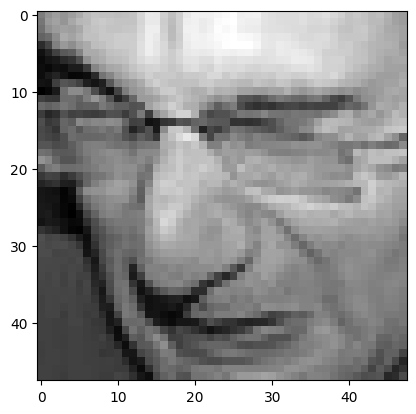

In [40]:
image = '/content/face-expression-recognition-dataset/images/validation/disgust/10053.jpg'
print("Original image is of disgust")

img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is =", pred_label)
plt.imshow(img.reshape(48,48), cmap='gray')

Original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Model prediction is = happy


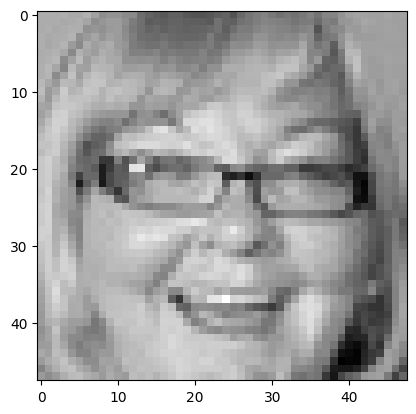

In [42]:
image = '/content/face-expression-recognition-dataset/images/validation/happy/10237.jpg'
print("Original image is of happy")

img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is =", pred_label)
plt.imshow(img.reshape(48,48), cmap='gray')

Original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Model prediction is = neutral


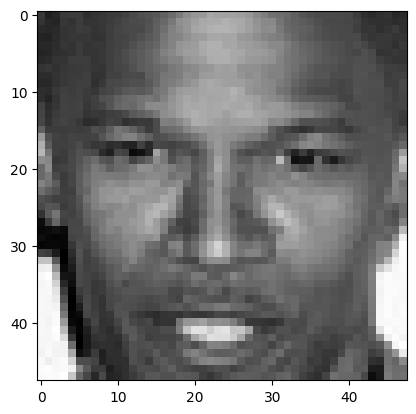

In [41]:
image = '/content/face-expression-recognition-dataset/images/validation/fear/10263.jpg'
print("Original image is of fear")

img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is =", pred_label)
plt.imshow(img.reshape(48,48), cmap='gray')

Original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model prediction is = surprise


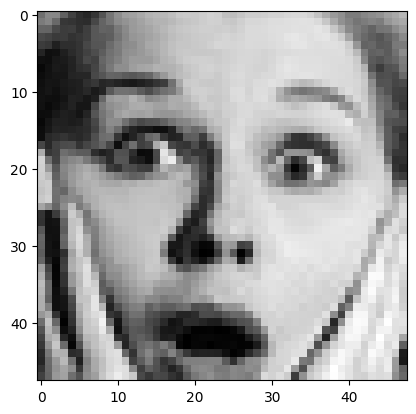

In [45]:
image = '/content/face-expression-recognition-dataset/images/validation/surprise/1033.jpg'
print("Original image is of surprise")

img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is =", pred_label)
plt.imshow(img.reshape(48,48), cmap='gray')